In [2]:
%matplotlib notebook
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
print(matplotlib.__version__)

2.2.2


# An Implementation of Griesmeyer pp. 1-4
Find the shortest distance between two skewed pointing vectors

In [3]:
vj = np.array([-1,-1,0]) # Sensor j
vk = np.array([1,-1,0]) # Sensor k
Tjk = np.array([0,0,0]) # true target
pj = (Tjk - vj).astype(float)
pj /= np.linalg.norm(pj)
pk = (Tjk - vk).astype(float)
pk /= np.linalg.norm(pk)

In [18]:
n = np.linspace(0,3,100)
pj_line = vj + np.outer(n,pj)
pk_line = vk + np.outer(n,pk)

<IPython.core.display.Javascript object>


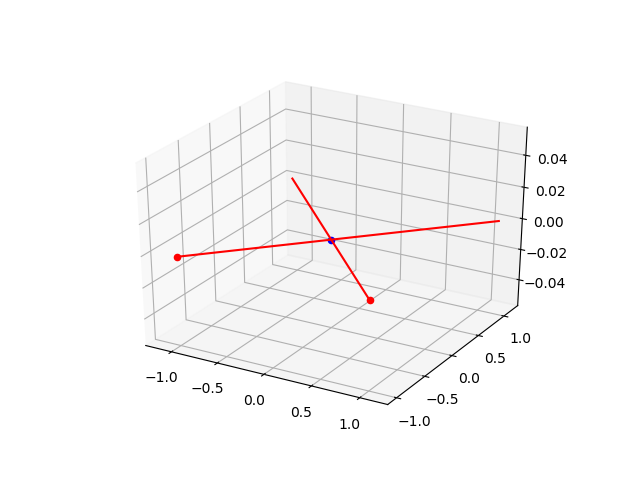

In [29]:
# Plot this s!@# in 3D which, like, how?
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Tjk[0],Tjk[1],Tjk[2],color='b')
ax.scatter(vj[0],vj[1],vj[2],color='r')
ax.plot(pj_line[:,0],pj_line[:,1],pj_line[:,2],'-r')
ax.scatter(vk[0],vk[1],vk[2],color='r')
ax.plot(pk_line[:,0],pk_line[:,1],pk_line[:,2],'-r')

In [30]:
# Add a little bit of skew to pk
pkp = (np.array([0,0,.1]) - vk).astype(float)
pkp /= np.linalg.norm(pkp) # call this pk prime
pkp_line = vk + np.outer(n,pkp)

<IPython.core.display.Javascript object>


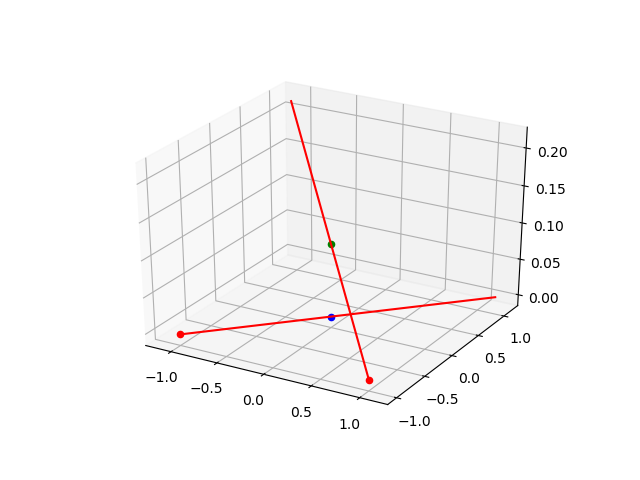

In [32]:
# Replot it in 3d and see that they no longer intersect at blue dot
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Tjk[0],Tjk[1],Tjk[2],color='b')
ax.scatter(vj[0],vj[1],vj[2],color='r')
ax.plot(pj_line[:,0],pj_line[:,1],pj_line[:,2],'-r')
ax.scatter(vk[0],vk[1],vk[2],color='r')
ax.plot(pkp_line[:,0],pkp_line[:,1],pkp_line[:,2],'-r')
ax.scatter(0,0,0.1,color='g')

In [42]:
# Follow Griesmeyer to find tj, tk
tmpA = np.dot( pj, pkp ) * np.dot( pj, ( vj - vk ) ) + np.dot( pkp, ( vk - vj ) )
tmpB = np.dot( pj, pkp ) ** 2 - 1
tk = A / B
tj = np.dot( pj, ( vk + tk * pkp - vj ) )
mk = vk + tk * pkp
mj = vj + tj * pj

<IPython.core.display.Javascript object>


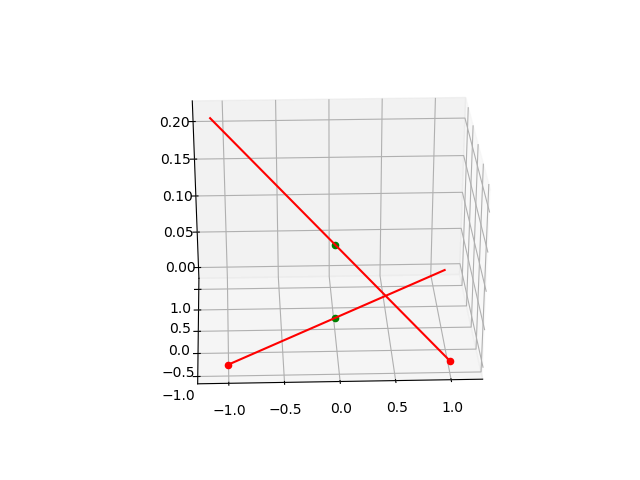

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(vj[0],vj[1],vj[2],color='r')
ax.plot(pj_line[:,0],pj_line[:,1],pj_line[:,2],'-r')
ax.scatter(vk[0],vk[1],vk[2],color='r')
ax.plot(pkp_line[:,0],pkp_line[:,1],pkp_line[:,2],'-r')
ax.scatter(mk[0],mk[1],mk[2], color='g')
ax.scatter(mj[0],mj[1],mj[2],color='g')

In [44]:
Mjk = vk + tk * pkp - vj - tj * pj
print(Mjk)
Djk = np.linalg.norm(Mjk)
print(Djk)

[ 0.00497512 -0.00497512  0.09950249]
0.09975093361076329
